In [301]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import librosa
import librosa.display
import torchaudio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [333]:
y, sr = librosa.load('../data/crowd-cheering.mp3', mono=True, duration=6, sr=None)

In [335]:
y.shape, sr

((264600,), 44100)

In [336]:
librosa.core.get_duration(y, sr)

6.0

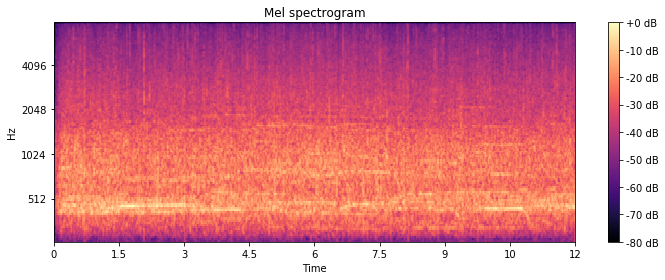

(128, 517)

In [337]:
S = librosa.feature.melspectrogram(y=y, n_mels=128, fmax=8000)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), 
                        y_axis='mel', fmax=8000, 
                        x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()
S.shape

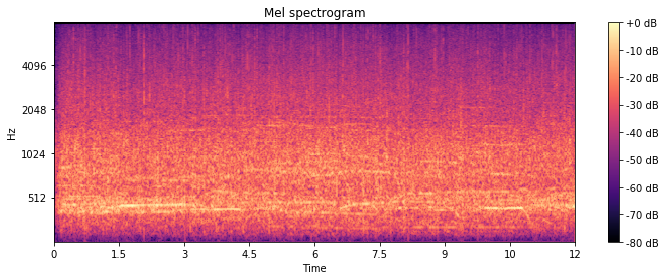

(256, 517)

In [338]:
S = librosa.feature.melspectrogram(y=y, n_mels=128*2, fmax=8000)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), 
                        y_axis='mel', fmax=8000, 
                        x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()
S.shape

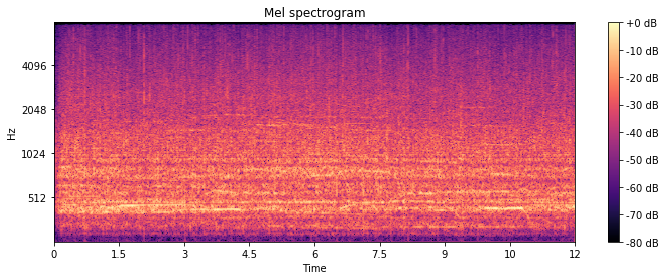

(512, 517)

In [339]:
S = librosa.feature.melspectrogram(y=y, n_mels=128*4, fmax=8000)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), 
                        y_axis='mel', fmax=8000, 
                        x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()
S.shape

In [340]:
df = pd.DataFrame(S)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,...,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,512.000000
mean,1.266210e-08,3.741186e-03,7.588867e-02,1.319331e-01,1.783031e-01,3.377640e-01,4.661341e-01,7.463287e-01,1.176352e+00,1.247438e+00,...,8.965845e-01,1.353882e+00,1.067246e+00,8.730420e-01,1.127740e+00,1.216618e+00,9.029853e-01,9.146808e-01,1.714951e+00,1.809672
std,4.010344e-08,6.854842e-03,1.442653e-01,2.885132e-01,5.011491e-01,8.957932e-01,1.238364e+00,2.654728e+00,4.169881e+00,3.885248e+00,...,2.534615e+00,6.101131e+00,4.301844e+00,3.394161e+00,3.883110e+00,3.604932e+00,2.903076e+00,4.042932e+00,1.116370e+01,10.169426
min,9.044594e-14,8.485057e-10,2.496977e-09,3.525810e-09,4.710080e-09,5.391166e-09,7.523325e-09,9.565887e-09,5.051025e-09,6.158464e-09,...,3.310171e-09,2.627986e-09,3.177457e-09,1.673898e-08,1.273913e-08,1.771443e-08,1.730516e-08,7.786879e-09,6.092625e-08,0.000024
25%,4.408527e-10,3.378706e-05,5.926907e-04,1.632201e-03,1.580039e-03,3.050402e-03,4.888501e-03,5.239685e-03,9.109755e-03,1.045567e-02,...,2.184231e-02,1.556355e-02,1.107059e-02,9.319228e-03,1.183762e-02,1.440107e-02,9.197184e-03,8.429428e-03,8.136828e-03,0.016688
50%,1.595738e-09,3.235976e-04,4.818329e-03,9.540179e-03,1.059439e-02,2.183748e-02,4.084431e-02,4.881158e-02,7.805639e-02,8.064445e-02,...,1.062456e-01,7.633932e-02,6.752879e-02,5.487025e-02,6.545388e-02,1.132772e-01,5.992151e-02,5.723158e-02,5.933792e-02,0.073989
75%,7.222426e-09,3.891428e-03,8.124584e-02,1.133713e-01,8.910460e-02,1.673739e-01,2.736242e-01,4.588404e-01,5.933649e-01,6.436902e-01,...,5.909222e-01,6.092102e-01,5.600999e-01,4.346813e-01,6.036355e-01,6.162480e-01,4.835348e-01,4.172210e-01,4.364597e-01,0.434692
max,4.908805e-07,3.843774e-02,8.715884e-01,2.099324e+00,4.745066e+00,6.169777e+00,1.417259e+01,3.412954e+01,5.218430e+01,4.187749e+01,...,2.111665e+01,8.452040e+01,7.347098e+01,3.823684e+01,6.313684e+01,3.315263e+01,2.798670e+01,4.929728e+01,1.498630e+02,147.918113


In [342]:
librosa.output.write_wav(y=y, sr=sr, path='../data/wave_output.wav')